In [4]:
import pandas as pd

file_path = r"C:\Users\manis\Downloads\youtube.xlsx"
df = pd.read_excel(file_path)

print("Data loaded successfully. Here are the first 5 rows:")
print(df.head())

Data loaded successfully. Here are the first 5 rows:
                  author  authorIsChannelOwner                         cid  \
0  @katlynnstevenson5653                 False  UgymzlA6wnCV2YJQZT94AaABAg   
1               @Kperez1                 False  UgwDR5fiNgN5BwJGig54AaABAg   
2            @trevor4136                 False  UgwULq8jZ9Bm_FO14bZ4AaABAg   
3               @bbprtsf                 False  UgzhYn8JTlgxdniZv7F4AaABAg   
4  @cristinahudspeth5829                 False  Ugwc9-FxDRj-mh9VvwR4AaABAg   

                                             comment  commentsCount  \
0  The United States is one of the only wealthy n...           1517   
1  Nah.... watching this almost through 2025 is s...           1517   
2  only way to accomplish this is to kill 80% of ...           1517   
3  As long as Capitalist is the norm, some SDG is...           1517   
4  A decade has passed, and the world is in a wor...           1517   

   hasCreatorHeart                                 

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

comments = df['comment'].dropna().astype(str)

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

processed_comments = comments.apply(preprocess_text)

print("Text preprocessing complete. Here are the first 5 processed comments:")
print(processed_comments.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text preprocessing complete. Here are the first 5 processed comments:
0    united state one wealthy nation world see kind...
1    nah watching almost sad especially living america
2                       way accomplish kill population
3                    long capitalist norm sdg possible
4                      decade passed world worse state
Name: comment, dtype: object


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(processed_comments)

num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=1, max_iter=1000)
nmf_model.fit(tfidf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
print("Identified Topics:")
display_topics(nmf_model, feature_names, no_top_words)

Identified Topics:
Topic 1:
paris abrahamic accord agreement france macron emmanuel bank law great
Topic 2:
people goal global country poverty dont video social like way
Topic 3:
thank sir informative presentation lecture useful video excellent tedx marvelous
Topic 4:
world better place make order new human thought government speech
Topic 5:
talk nice excellent ted interesting good information informative sir session


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n, top_k=10):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_k]

top_bigrams = get_top_ngrams(processed_comments, n=2, top_k=10)
print("Top 10 Bigrams:")
print(pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency']))

print("\n" + "="*30 + "\n")

top_trigrams = get_top_ngrams(processed_comments, n=3, top_k=10)
print("Top 10 Trigrams:")
print(pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency']))

Top 10 Bigrams:
             Bigram  Frequency
0   emmanuel macron         54
1   paris agreement         54
2  abrahamic accord         54
3    climate change         44
4       global goal         36
5      better place         34
6      world better         32
7        world bank         30
8    world economic         29
9    economic forum         29


Top 10 Trigrams:
                    Trigram  Frequency
0      world economic forum         29
1        world better place         28
2  antichrist revived roman         27
3      revived roman empire         27
4          roman empire rev         27
5           empire rev head         27
6             rev head horn         27
7        head horn european         27
8       horn european union         27
9   european union emmanuel         27


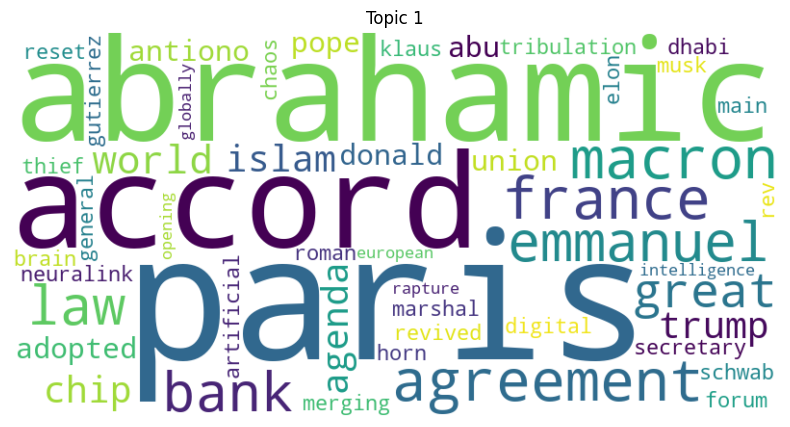

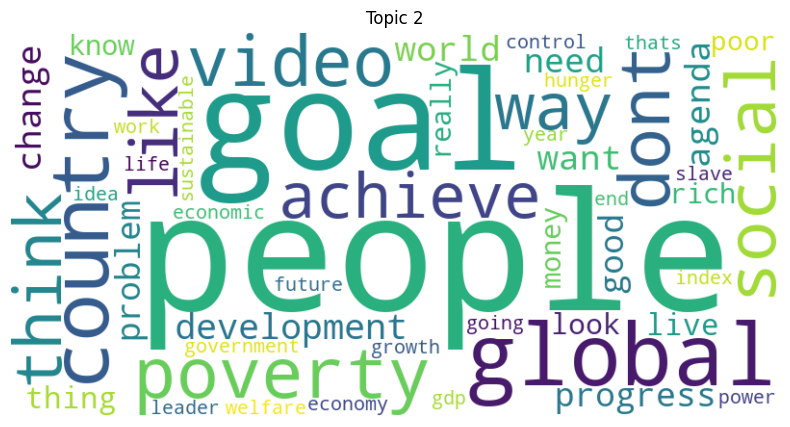

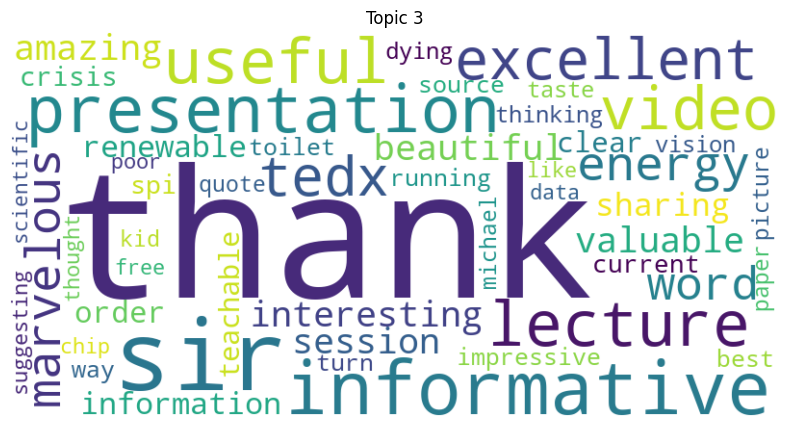

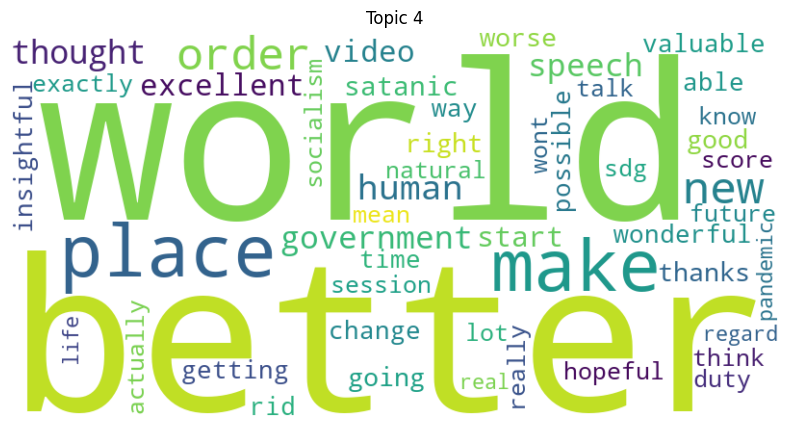

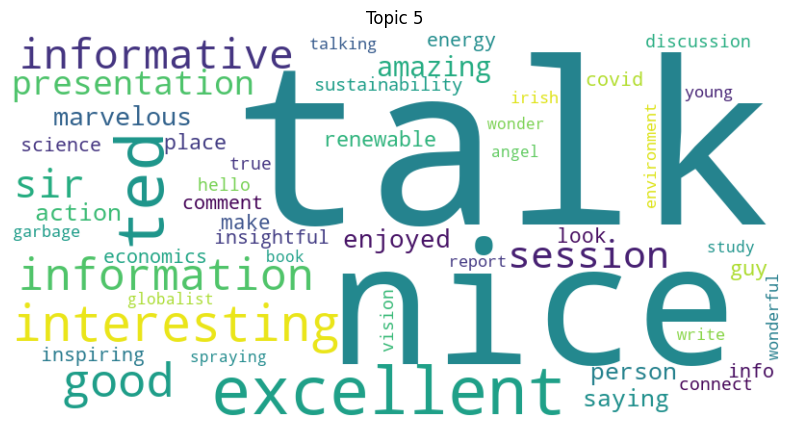

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(nmf_model.components_):
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-50 - 1:-1]}
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx + 1}')
    plt.axis("off")
    plt.show()